# Machine Learning Final Project

# Questions

# 1. Your views about the problem statement?

My view is that Machine Learning model can provide objective on this problem based on many variables like college, Experience, Role, previous CTC and academic record. Moreover, my role is to make a effective machine learning model or predictive model and evaluate its performance.

# 2. What will be your approach to solving this task?

To build a predictive model, these are the general steps:

##### (i) Data Preprocessing:

* Convert "College" and "cities" into a numerical data type .
* Create dummy variables for the "Tier" and "Role" fields.
* Perform (EDA) and check for null values.
* Visualize various graphs to find outliers.
* Identify outliers using percentiles (i.e., 99th and 1st percentiles) .
* Treat outliers by replacing them with the mean if outliers are present.

##### (ii) Model selection:

* Choose a suitable machine learning algorithm for predicting salary.
* do Standardisation of data for required models.
* Try multiple models to assess their performance.

##### (iii) Model training:

* Split the data into test and train datasets.
* Train the particular model on the training dataset.
* Evaluate the model's performance using metrics like R-Squared and Mean Squared Error.
* Select the model with the best performance.

##### (iv) Model Evaluation:

* Evaluate the model's performance using techniques such as cross-validation and hyperparameter tuning.

##### (v) Model deployment:

* After performing the all model and get the result I will choose the best model according to R2 score and Mean Squared Error (MSE). Model which have High R2 score and Less MSE is the best one.

# 3. What were the available ML model options you had to perform this task?

For predicting employee salaries, we considered various regression models:

##### Simple Linear Regression:

- Suitable when there's a straightforward, linear relationship between one feature and salary.
##### Multiple Linear Regression:

- Useful when multiple features influence salary, allowing for more complex relationships to be considered.
##### Ridge Regression:

- Prevents overfitting by adding a penalty term, making it ideal for handling multicollinearity among features.
##### Lasso Regression:

- Combats overfitting and aids feature selection by encouraging some features to have zero influence on salary prediction.
##### Decision Tree Regression:

- A non-linear model that captures complex relationships when the salary prediction is not linear.
##### Random Forest Regressor:

- An ensemble learning model that combines multiple decision trees to improve predictive performance.
##### XG Boost Regressor:

- A gradient boosting model known for its high predictive power and computational efficiency.
##### Bagging Regressor:

- Utilizes Bootstrap Aggregating to create an ensemble of multiple decision tree regressors for enhanced prediction accuracy.

The model with the best predictive accuracy will be selected for further optimization.

# 4. Which model’s performance is best and what could be the possible reason for that?
I evaluated several regression models to predict the target variable, and here are the results:

##### Linear Regression:

R-squared (R^2) - Train: 0.5335, Test: 0.5367
Mean Squared Error (MSE) - Train: 7.50261e+07, Test: 6.8751323e+07
##### Ridge Regression:

R-squared (R^2) - Train: 0.5334, Test: 0.5365
Mean Squared Error (MSE) - Train: 7.50358e+07, Test: 6.87807e+07
##### Lasso Regression:

R-squared (R^2) - Train: 0.5369, Test: 0.5335
Mean Squared Error (MSE) - Train: 7.50294e+07, Test: 687159e+07
##### Decision Tree Regression:

R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 6.21251e+07, Test: 6.04246e+07
##### Decision Tree Regression with GridSearchCV:

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
R-squared (R^2) - Train: 0.6398, Test: 0.6032
Mean Squared Error (MSE) - Train: 5.7933e+07, Test: 5.8875e+07
##### Random Forest Regressor:

Best Hyperparameters: RandomForestRegressor(max_depth=20, n_estimators=100)
R-squared (R^2) - Train: 0.8968, Test: 0.6492
Mean Squared Error (MSE) - Train: 1.66042e+07, Test: 5020502e+07
##### XG Boost Regressor:

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
R-squared (R^2) - Train: 0.6531, Test: 0.5931
Mean Squared Error (MSE) - Train: 5.6714e+07, Test: 5.83896e+07
##### Bagging Regressor:

Best Hyperparameters: BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200, random_state=0)
R-squared (R^2) - Train: 0.9452, Test: 0.5926
Mean Squared Error (MSE) - Train: 8.95275e+06, Test: 5.8425e+07

#### Based on the results, the Random Forest Regressor with the hyperparameters (max_depth=20, n_estimators=100) is the best performer for predicting the target variable.

# 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model the steps i followed:

##### 1.Validation Curve for Ridge and Lasso Regression:

* For Ridge regression & Lasso regression, I used a validation curve to explore different values of alpha. 

* The optimal alpha values are crucial for regularizing the model and preventing overfitting.

##### 2.GridSearchCV for Tree Regression:
*  
To further improve the performance of the Decision Tree Regression model, I utilized GridSearchCV. This technique systematically searches through a range of hyperparameters to find the best combination that optimizes model performanc
* By performing these steps, I have fine-tuned the model and optimized its hyperparameters to increase its efficiency and accuracy in making predictions.e.

# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/ML case Study.csv",header=0)
college_data_df = pd.read_csv("D:/Colleges.csv",header=0)
city_data_df = pd.read_csv("D:/cities.csv",header=0)

In [3]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager         55523   
1         NIT Bhopal            Ajmer  Executive         57081   
2       IEM, Kolkata  Rajpur Sonarpur  Executive         60347   
3  KIIT, Bhubaneswar            Ajmer  Executive         49010   
4                DTU         Durgapur  Executive         57879   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [7]:
college_data_df.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [9]:
city_data_df.head()

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

In [11]:
# Function to assign tier labels to colleges based on 'college_data_df'.

def assign_tier(row):
    if row['College'] in college_data_df['Tier 1'].values:
        return 'Tier 1'
    elif row['College'] in college_data_df['Tier 2'].values:
        return 'Tier 2'
    elif row['College'] in college_data_df['Tier 3'].values:
        return 'Tier 3'
    else:
        return 'Unknown'

In [13]:
# Function to assign a city type (metro or non-metro) based on 'city_data_df'.

def assign_city(row):
    if row['City'] in city_data_df['Metrio City'].values:
        return 1
    elif row['City'] in city_data_df['non-metro cities'].values:
        return 0
    else:
        return 'unknown'

In [15]:
# Apply 'assign_city' function to create a 'metro_city' column in the 'df' dataframe.
df['metro_city'] = df.apply(assign_city, axis=1)

# Apply 'assign_tier' function to create a 'Tier' column in the 'df' dataframe.
df['Tier'] = df.apply(assign_tier, axis=1)

In [17]:
df

College             City       Role  Previous CTC  \
0                     SVNIT Surat          Asansol    Manager         55523   
1                      NIT Bhopal            Ajmer  Executive         57081   
2                    IEM, Kolkata  Rajpur Sonarpur  Executive         60347   
3               KIIT, Bhubaneswar            Ajmer  Executive         49010   
4                             DTU         Durgapur  Executive         57879   
...                           ...              ...        ...           ...   
1584     BITS Pilani (Goa Campus)            Surat  Executive         61285   
1585                 NIT Warangal  Rajpur Sonarpur  Executive         63140   
1586    NIT Tiruchipally (Trichy)        Ahmedabad  Executive         44907   
1587               IIIT Hyderabad         Durgapur  Executive         52054   
1588  R.V. College of Engineering            Delhi    Manager         44353   

      Previous job change  Graduation Marks  EXP (Month)       CTC  \
0                       3                66           19  71406.58   
1                       1                84           18  68005.87   
2                       2                52           28  76764.02   
3                       2                81           33  82092.39   
4                       4                74           32  73878.10   
...                   ...               ...          ...       ...   
1584                    3                44           60  77283.59   
1585                    1                44           24  68416.86   
1586                    1                60           19  70186.19   
1587                    2                67           29  73394.09   
1588                    3                75           18  70056.31   

      metro_city    Tier  
0              0  Tier 2  
1              0  Tier 2  
2              0  Tier 3  
3              0  Tier 3  
4              0  Tier 1  
...          ...     ...  
1584           1  Tier 1  
1585           0  Tier 1  
1586           1  Tier 1  
1587           0  Tier 1  
1588           1  Tier 2  

[1589 rows x 10 columns]

# creating Dummy variables

In [19]:
#Create Dummies variable for 'Tier' and 'Role' columns
df = pd.get_dummies(df, columns = ['Tier', 'Role'])

#Rename 
df = df.rename(columns={'Tier_Tier 1': 'Tier_1'})
df = df.rename(columns={'Tier_Tier 2': 'Tier_2'})
df = df.rename(columns={'Tier_Tier 3': 'Tier_3'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Previous CTC         1589 non-null   int64  
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   metro_city           1589 non-null   int64  
 8   Tier_1               1589 non-null   bool   
 9   Tier_2               1589 non-null   bool   
 10  Tier_3               1589 non-null   bool   
 11  Role_Executive       1589 non-null   bool   
 12  Role_Manager         1589 non-null   bool   
dtypes: bool(5), float64(1), int64(5), object(2)
memory usage: 107.2+ KB


In [23]:
# deleting unnecessary columns

del df['College']
del df['City']

In [25]:
# Convert boolean columns to integer (0 or 1) in the 'df' dataframe.

for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)


In [27]:
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0         55523                    3                66           19  71406.58   
1         57081                    1                84           18  68005.87   
2         60347                    2                52           28  76764.02   
3         49010                    2                81           33  82092.39   
4         57879                    4                74           32  73878.10   

   metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  Role_Manager  
0           0       0       1       0               0             1  
1           0       0       1       0               1             0  
2           0       0       0       1               1             0  
3           0       0       0       1               1             0  
4           0       1       0       0               1             0

# EDD analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   int64  
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   int32  
 7   Tier_2               1589 non-null   int32  
 8   Tier_3               1589 non-null   int32  
 9   Role_Executive       1589 non-null   int32  
 10  Role_Manager         1589 non-null   int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 105.6 KB


In [31]:
df.shape

(1589, 11)

In [33]:
df.describe()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.000000   
mean   55518.453744             2.528634         59.855255    39.044682   
std     6655.218445             1.123918         14.935139    14.108875   
min    36990.000000             1.000000         35.000000    18.000000   
25%    50518.000000             2.000000         46.000000    26.000000   
50%    55291.000000             3.000000         60.000000    39.000000   
75%    60109.000000             4.000000         73.000000    51.000000   
max    77911.000000             4.000000         85.000000    64.000000   

                 CTC   metro_city       Tier_1       Tier_2       Tier_3  \
count    1589.000000  1589.000000  1589.000000  1589.000000  1589.000000   
mean    75353.278798     0.514160     0.363751     0.297042     0.339207   
std     12587.288237     0.499957     0.481230     0.457099     0.473589   
min     53020.320000     0.000000     0.000000     0.000000     0.000000   
25%     66902.350000     0.000000     0.000000     0.000000     0.000000   
50%     73028.670000     1.000000     0.000000     0.000000     0.000000   
75%     80588.670000     1.000000     1.000000     1.000000     1.000000   
max    123416.990000     1.000000     1.000000     1.000000     1.000000   

       Role_Executive  Role_Manager  
count     1589.000000   1589.000000  
mean         0.793581      0.206419  
std          0.404862      0.404862  
min          0.000000      0.000000  
25%          1.000000      0.000000  
50%          1.000000      0.000000  
75%          1.000000      0.000000  
max          1.000000      1.000000

In [35]:
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0         55523                    3                66           19  71406.58   
1         57081                    1                84           18  68005.87   
2         60347                    2                52           28  76764.02   
3         49010                    2                81           33  82092.39   
4         57879                    4                74           32  73878.10   

   metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  Role_Manager  
0           0       0       1       0               0             1  
1           0       0       1       0               1             0  
2           0       0       0       1               1             0  
3           0       0       0       1               1             0  
4           0       1       0       0               1             0

# checking missing values

In [37]:
# Calculate the count of null values for each column in the 'df' DataFrame.
null_values = df.isna().sum()

# Print columns with more than 0 null values.
print(null_values[null_values > 0])

Series([], dtype: int64)


# outliers

<Axes: xlabel='Previous CTC', ylabel='CTC'>

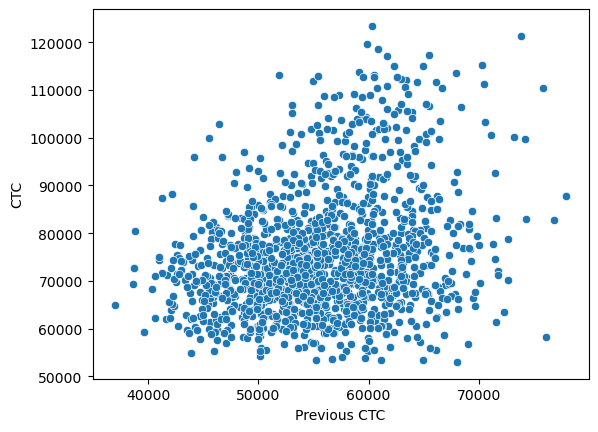

In [39]:
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

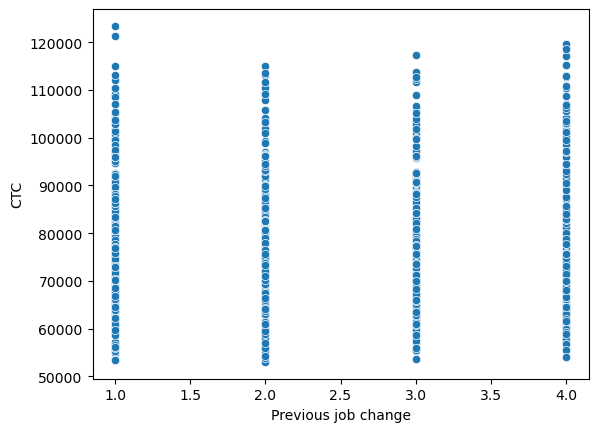

In [1981]:
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

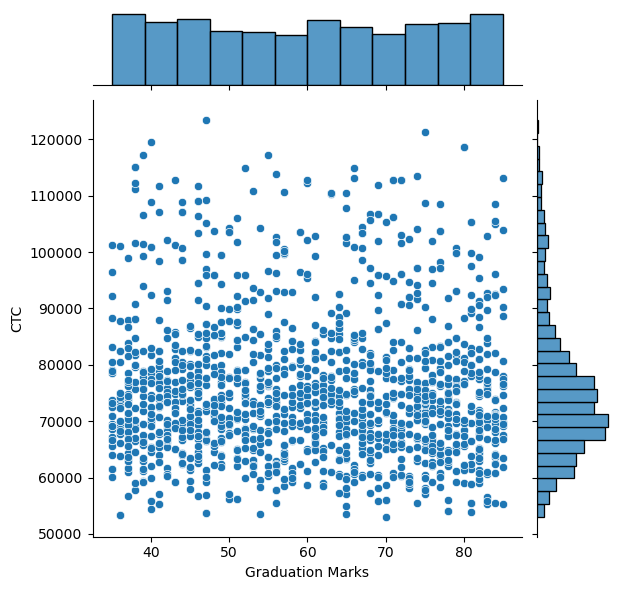

In [1982]:
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

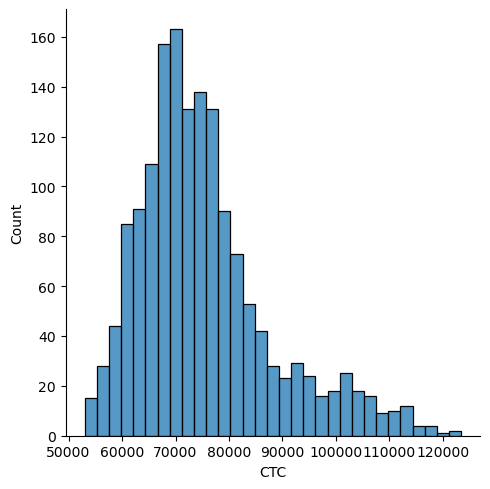

In [1983]:
sns.displot(df['CTC'])

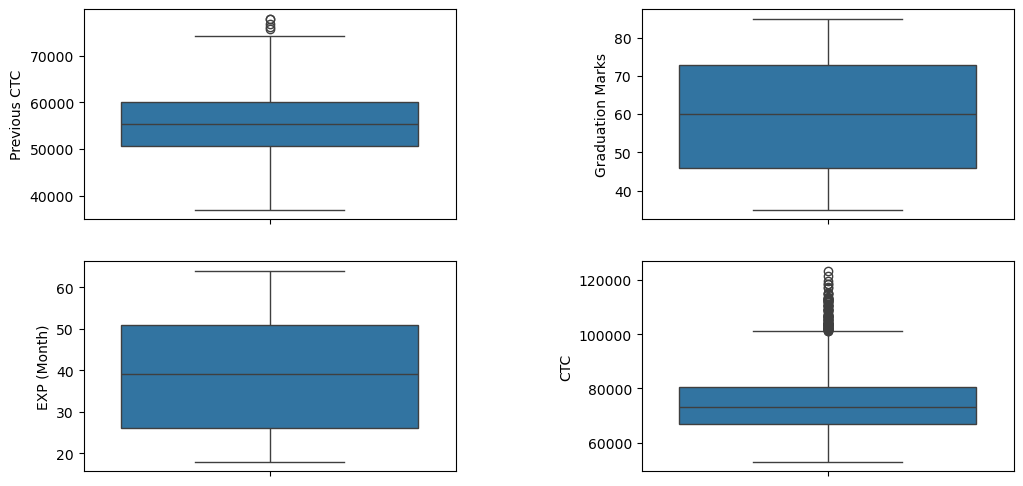

In [1984]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

In [41]:
# Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame.

upper_limit = np.percentile(df['Previous CTC'], [99])[0]
upper_limit

71506.92

In [43]:
#check values that highr then upper value

df[(df['Previous CTC'] > upper_limit)]

#there is many values that is higher then upper limit but it is in considerable range

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
116          77911                    1                50           58   
292          74198                    1                57           25   
543          73856                    1                75           54   
572          71543                    4                82           30   
701          71549                    4                47           50   
847          71756                    4                67           23   
860          75785                    4                63           37   
941          72319                    1                51           50   
1024         72661                    3                74           47   
1047         73214                    4                57           22   
1067         71760                    4                40           39   
1088         76815                    4                75           52   
1131         74256                    2                40           27   
1317         76070                    2                54           18   
1332         72649                    3                69           52   
1454         77911                    1                50           58   

            CTC  metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  \
116    87831.62           1       0       0       1               1   
292    99644.51           0       0       0       1               0   
543   121362.73           1       1       0       0               0   
572    61366.78           1       1       0       0               1   
701    83116.21           0       0       1       0               1   
847    72141.43           1       1       0       0               1   
860   110338.25           1       1       0       0               0   
941    63538.43           1       0       0       1               1   
1024   70238.70           1       1       0       0               1   
1047  100119.53           0       1       0       0               0   
1067   71187.52           0       0       0       1               1   
1088   82684.17           1       0       0       1               1   
1131   83023.18           1       0       1       0               1   
1317   58309.56           0       1       0       0               1   
1332   78861.46           1       0       0       1               1   
1454   87831.62           1       1       0       0               1   

      Role_Manager  
116              0  
292              1  
543              1  
572              0  
701              0  
847              0  
860              1  
941              0  
1024             0  
1047             1  
1067             0  
1088             0  
1131             0  
1317             0  
1332             0  
1454             0

In [45]:
#replace values that is higher then upper limit

df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_21920\2655405489.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit
C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel

In [47]:
#upper limit for CTC

upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [49]:
upper_limit2

112826.26

In [51]:
df[(df['CTC'] > upper_limit2)]

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
34           60894                    4                80           28   
185          70258                    4                38           36   
254          51912                    2                66           50   
328          62264                    2                52           64   
543          73856                    1                75           54   
577          59101                    3                56           31   
668          60476                    1                85           62   
883          64930                    1                66           51   
1146         61709                    4                39           60   
1230         60298                    1                47           52   
1240         67907                    2                74           52   
1284         65519                    3                55           61   
1300         59883                    4                40           45   
1372         60894                    4                80           28   
1523         70258                    4                38           36   

            CTC  metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  \
34    118651.89           0       1       0       0               0   
185   115126.75           0       0       1       0               0   
254   113141.14           1       0       1       0               0   
328   114996.23           0       0       0       1               0   
543   121362.73           1       1       0       0               0   
577   113843.16           1       0       0       1               0   
668   113212.07           1       1       0       0               0   
883   114939.65           1       0       0       1               0   
1146  117207.24           1       1       0       0               0   
1230  123416.99           0       0       1       0               0   
1240  113508.80           1       0       1       0               0   
1284  117307.70           1       0       1       0               0   
1300  119585.49           1       0       1       0               0   
1372  118651.89           1       1       0       0               0   
1523  115126.75           1       0       1       0               0   

      Role_Manager  
34               1  
185              1  
254              1  
328              1  
543              1  
577              1  
668              1  
883              1  
1146             1  
1230             1  
1240             1  
1284             1  
1300             1  
1372             1  
1523             1

In [53]:
df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_21920\2453018167.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2
C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_21920\245301816

##### there are no outliers in the datasets.

# correlation matrix

In [55]:
df.corr()

Previous CTC  Previous job change  Graduation Marks  \
Previous CTC             1.000000             0.005756         -0.032976   
Previous job change      0.005756             1.000000          0.019267   
Graduation Marks        -0.032976             0.019267          1.000000   
EXP (Month)              0.119163             0.023488         -0.057061   
CTC                      0.258000             0.011370         -0.005450   
metro_city               0.004644             0.051670         -0.018616   
Tier_1                  -0.031366             0.045931          0.005666   
Tier_2                  -0.010947             0.004271         -0.018419   
Tier_3                   0.042438            -0.050794          0.012021   
Role_Executive          -0.012321             0.017150         -0.017858   
Role_Manager             0.012321            -0.017150          0.017858   

                     EXP (Month)       CTC  metro_city    Tier_1    Tier_2  \
Previous CTC            0.119163  0.258000    0.004644 -0.031366 -0.010947   
Previous job change     0.023488  0.011370    0.051670  0.045931  0.004271   
Graduation Marks       -0.057061 -0.005450   -0.018616  0.005666 -0.018419   
EXP (Month)             1.000000  0.301115   -0.023613 -0.003323 -0.014558   
CTC                     0.301115  1.000000   -0.020365  0.019912  0.012346   
metro_city             -0.023613 -0.020365    1.000000  0.002135  0.022917   
Tier_1                 -0.003323  0.019912    0.002135  1.000000 -0.491510   
Tier_2                 -0.014558  0.012346    0.022917 -0.491510  1.000000   
Tier_3                  0.017427 -0.032149   -0.024288 -0.541736 -0.465741   
Role_Executive          0.026751 -0.621311    0.048671 -0.015158  0.004865   
Role_Manager           -0.026751  0.621311   -0.048671  0.015158 -0.004865   

                       Tier_3  Role_Executive  Role_Manager  
Previous CTC         0.042438       -0.012321      0.012321  
Previous job change -0.050794        0.017150     -0.017150  
Graduation Marks     0.012021       -0.017858      0.017858  
EXP (Month)          0.017427        0.026751     -0.026751  
CTC                 -0.032149       -0.621311      0.621311  
metro_city          -0.024288        0.048671     -0.048671  
Tier_1              -0.541736       -0.015158      0.015158  
Tier_2              -0.465741        0.004865     -0.004865  
Tier_3               1.000000        0.010706     -0.010706  
Role_Executive       0.010706        1.000000     -1.000000  
Role_Manager        -0.010706       -1.000000      1.000000

# linear regression

# simple linear regression

In [57]:
import statsmodels.api as sn

In [59]:
x = sn.add_constant(df['EXP (Month)'])

In [61]:
lm = sn.OLS(df['CTC'], x).fit()

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.16e-34
Time:                        07:50:24   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

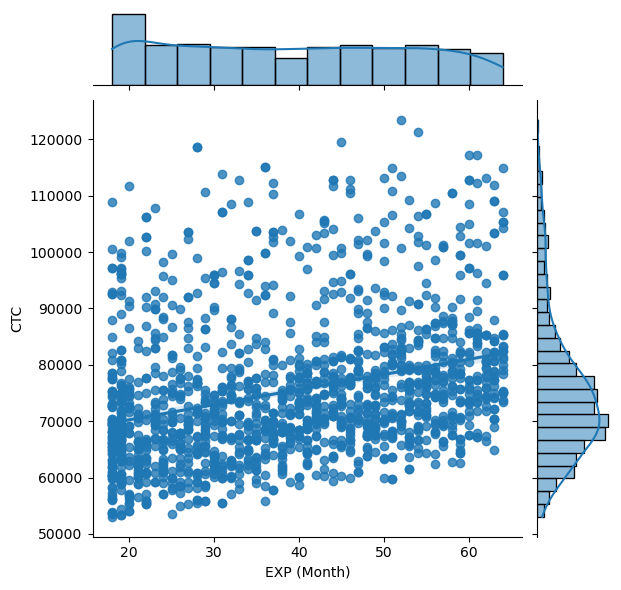

In [65]:
sns.jointplot(x=df['EXP (Month)'], y = df['CTC'], data = df, kind = 'reg')

# Multiple Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
X_multi = df.drop('CTC', axis = 1)

In [71]:
X_multi.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0         55523                    3                66           19   
1         57081                    1                84           18   
2         60347                    2                52           28   
3         49010                    2                81           33   
4         57879                    4                74           32   

   metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  Role_Manager  
0           0       0       1       0               0             1  
1           0       0       1       0               1             0  
2           0       0       0       1               1             0  
3           0       0       0       1               1             0  
4           0       1       0       0               1             0

In [73]:
y_multi = df['CTC']

In [75]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [77]:
X_multi_cons = sn.add_constant(X_multi)

In [79]:
X_multi_cons.head()

const  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0    1.0         55523                    3                66           19   
1    1.0         57081                    1                84           18   
2    1.0         60347                    2                52           28   
3    1.0         49010                    2                81           33   
4    1.0         57879                    4                74           32   

   metro_city  Tier_1  Tier_2  Tier_3  Role_Executive  Role_Manager  
0           0       0       1       0               0             1  
1           0       0       1       0               1             0  
2           0       0       0       1               1             0  
3           0       0       0       1               1             0  
4           0       1       0       0               1             0

In [81]:
lm_multi = sn.OLS(y_multi,X_multi_cons).fit()

In [83]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     227.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.36e-256
Time:                        07:50:45   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1580   BIC:                         3.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.573e+04   1172.349     21.949      0.000    2.34e+04     2.8e+04
Previous CTC            0.4105      0.033     12.542      0.000       0.346       0.475
Previous job change   125.3208    192.846      0.650      0.516    -252.941     503.582
Graduation Marks        6.6007     14.501      0.455      0.649     -21.843      35.044
EXP (Month)           261.6302     15.458     16.925      0.000     231.309     291.951
metro_city            368.3233    433.465      0.850      0.396    -481.903    1218.550
Tier_1               8859.9552    487.502     18.174      0.000    7903.737    9816.174
Tier_2               8989.0489    499.819     17.985      0.000    8008.671    9969.426
Tier_3               7883.2689    503.244     15.665      0.000    6896.173    8870.365
Role_Executive       3121.2698    625.065      4.994      0.000    1895.226    4347.313
Role_Manager         2.261e+04    662.859     34.111      0.000    2.13e+04    2.39e+04
==============================================================================
Omnibus:                       48.290   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.258
Skew:                           0.405   Prob(JB):                     2.72e-12
Kurtosis:                       3.384   Cond. No.                     4.95e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
lm3 = LinearRegression()

In [89]:
lm3.fit(X_multi,y_multi)

LinearRegression()

In [91]:
print(lm3.intercept_,lm3.coef_)

47175.83393920326 [ 4.10549221e-01  1.25320775e+02  6.60067696e+00  2.61630222e+02
  3.68323260e+02  2.82530883e+02  4.11624536e+02 -6.94155419e+02
 -9.74486669e+03  9.74486669e+03]


# Test-train split

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X_multi,y_multi,test_size=0.2,random_state =0)

In [97]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


In [99]:
lm_a = LinearRegression()

In [101]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [103]:
y_test_a = lm_a.predict(X_test)

In [105]:
y_train_a = lm_a.predict(X_train)

In [107]:
from sklearn.metrics import r2_score

In [109]:
r2_lm_multi_test = r2_score(y_test,y_test_a)

In [111]:
r2_lm_multi_test

0.5366674761765406

In [113]:
r2_lm_multi_train = r2_score(y_train,y_train_a)

In [2027]:
r2_lm_multi_train

0.5335038205027318

In [115]:
from sklearn.metrics import mean_squared_error

In [117]:
mse_lm_multi_train = mean_squared_error(y_train, y_train_a)
mse_lm_multi_test = mean_squared_error(y_test, y_test_a)

In [2030]:
mse_lm_multi_train

75026071.408006

In [2031]:
mse_lm_multi_test

68751323.92959404

# Ridge regression

In [119]:
from sklearn import preprocessing

In [121]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [123]:
X_train_s = scaler.transform(X_train)

In [125]:
X_test_s = scaler.transform(X_test)

In [127]:
from sklearn.linear_model import Ridge

In [129]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [131]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5366641338550269

In [133]:
from sklearn.model_selection import validation_curve

In [135]:
param_range = np.logspace(-2,8,100)

In [2042]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [137]:
train_scores, test_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2'
)

In [138]:
print(train_scores)
print(test_scores)

[[5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697521e-01 5.40103263e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697521e-01 5.40103263e-01 5.38017138e-01
  5.31074004e-01]
 [5.27263545e-01 5.33697520e-01 5.40103262e-01 5.38017137e-01
  5.31074003e-01]
 [5.27263544e-01 5.33697519e-01 5.40103261e-01 5.38017136e-01
  5.31074002e-01]
 [5.27263542e-01 5.33697517e-01 5.401032

In [141]:
train_mean = np.mean(train_scores,axis =1)

In [143]:
test_mean = np.mean(test_scores,axis =1)

In [145]:
train_mean

array([5.34031096e-01, 5.34031096e-01, 5.34031096e-01, 5.34031096e-01,
       5.34031096e-01, 5.34031096e-01, 5.34031096e-01, 5.34031095e-01,
       5.34031095e-01, 5.34031094e-01, 5.34031094e-01, 5.34031092e-01,
       5.34031090e-01, 5.34031087e-01, 5.34031082e-01, 5.34031073e-01,
       5.34031060e-01, 5.34031039e-01, 5.34031005e-01, 5.34030951e-01,
       5.34030865e-01, 5.34030729e-01, 5.34030512e-01, 5.34030167e-01,
       5.34029618e-01, 5.34028746e-01, 5.34027358e-01, 5.34025154e-01,
       5.34021654e-01, 5.34016099e-01, 5.34007291e-01, 5.33993343e-01,
       5.33971282e-01, 5.33936451e-01, 5.33881579e-01, 5.33795368e-01,
       5.33660380e-01, 5.33449903e-01, 5.33123431e-01, 5.32620286e-01,
       5.31850951e-01, 5.30685838e-01, 5.28941693e-01, 5.26366751e-01,
       5.22627238e-01, 5.17299800e-01, 5.09876416e-01, 4.99789390e-01,
       4.86462609e-01, 4.69390192e-01, 4.48234730e-01, 4.22926677e-01,
       3.93738459e-01, 3.61306796e-01, 3.26587512e-01, 2.90746757e-01,
      

In [147]:
max(test_mean)

0.5255132105170814

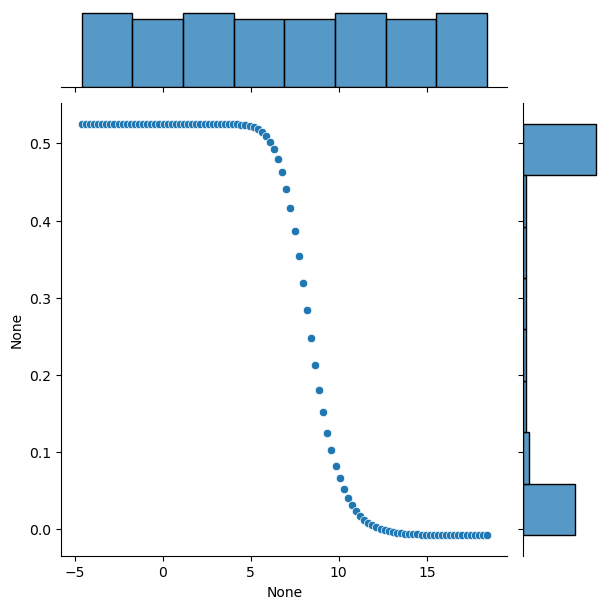

In [149]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [151]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [153]:
param_range[33]

21.544346900318846

In [155]:
lm_r_best = Ridge(alpha = param_range[33])

In [157]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=21.544346900318846)

In [159]:
r2_lm_r_best_test = r2_score(y_test,lm_r_best.predict(X_test_s))

In [2055]:
r2_lm_r_best_test

0.5364693722127882

In [161]:
r2_lm_r_best_train = r2_score(y_train,lm_r_best.predict(X_train_s))

In [2057]:
r2_lm_r_best_train

0.5334431376590947

In [163]:
mse_lm_r_best_train = mean_squared_error(y_train,lm_r_best.predict(X_train_s))
mse_lm_r_best_test = mean_squared_error(y_test,lm_r_best.predict(X_test_s))

In [2059]:
mse_lm_r_best_train

75035830.96351805

In [2060]:
mse_lm_r_best_test

68780719.469694

# lasso reg

In [165]:
from sklearn.linear_model import Lasso

In [167]:
lm_l = Lasso(alpha = 0.5)
lm_l.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [169]:
r2_score(y_test,lm_l.predict(X_test_s))

0.5366733735095368

In [171]:
from sklearn.model_selection import validation_curve

In [173]:
param_range = np.logspace(-2,8,100)

In [175]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [177]:
train_scores, test_scores = validation_curve(
    Lasso(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2'
)

In [178]:
print(train_scores)
print(test_scores)

[[0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.53107401]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.531074  ]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.531074  ]
 [0.52726355 0.53369752 0.54010326 0.53801714 0.531074  ]
 [0.52726354 0.53369752 0.54010326 0.53801714 0.531074  ]
 [0.52726354 0.53369752 0.54010326 0.53801714 0.531074  ]
 [0.52726354 0.53369752 0.54010326 0.53801713 0.531074  ]
 [0.52726354 0

In [181]:
train_mean = np.mean(train_scores,axis =1)

In [183]:
test_mean = np.mean(test_scores,axis =1)

In [185]:
train_mean

array([0.5340311 , 0.5340311 , 0.5340311 , 0.5340311 , 0.5340311 ,
       0.5340311 , 0.5340311 , 0.5340311 , 0.5340311 , 0.5340311 ,
       0.5340311 , 0.5340311 , 0.53403109, 0.53403109, 0.53403109,
       0.53403109, 0.53403109, 0.53403108, 0.53403108, 0.53403107,
       0.53403105, 0.53403102, 0.53403097, 0.5340309 , 0.53403078,
       0.5340306 , 0.5340303 , 0.53402983, 0.53402908, 0.53402788,
       0.53402598, 0.53402294, 0.5340181 , 0.53401049, 0.53399874,
       0.5339805 , 0.53395146, 0.53390521, 0.53383157, 0.5337193 ,
       0.53354538, 0.5332892 , 0.53288933, 0.53229827, 0.53141005,
       0.53015937, 0.52840736, 0.52582899, 0.52245597, 0.51744466,
       0.50946523, 0.49675975, 0.47652898, 0.44431586, 0.39302354,
       0.31754415, 0.25034069, 0.17442286, 0.05354021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

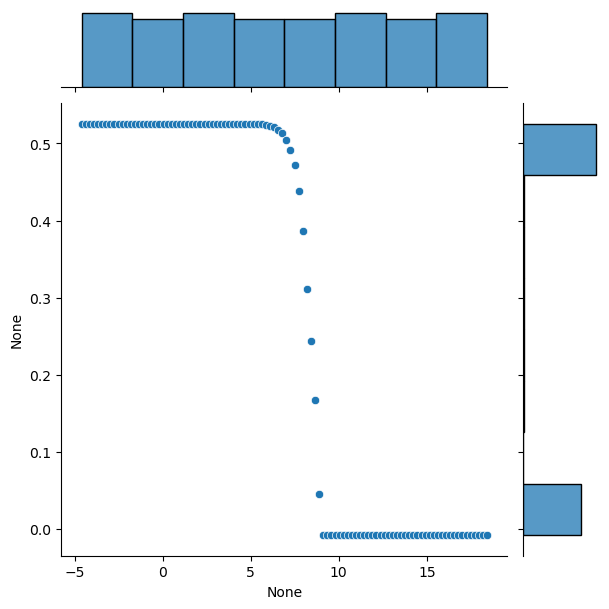

In [187]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [189]:
np.where(test_mean == max(test_mean))

(array([39], dtype=int64),)

In [191]:
param_range[33]

21.544346900318846

In [193]:
lm_l_best = Lasso(alpha = param_range[33])

In [195]:
lm_l_best.fit(X_train_s,y_train)

Lasso(alpha=21.544346900318846)

In [197]:
r2_lm_l_best_train = r2_score(y_test,lm_l_best.predict(X_test_s))

In [199]:
r2_lm_l_best_test = r2_score(y_train,lm_l_best.predict(X_train_s))

In [201]:
mse_lm_l_best_train = mean_squared_error(y_train,lm_l_best.predict(X_train_s))
mse_lm_l_best_test = mean_squared_error(y_test,lm_l_best.predict(X_test_s))

# desicion tree

In [203]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [205]:
y_train_regtree = regtree.predict(X_train)
y_test_regtree = regtree.predict(X_test)

In [207]:
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

In [209]:
r2_regtree_train

0.6137194061789908

In [2086]:
r2_regtree_test

0.5927831611924912

In [211]:
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)

In [2088]:
mse_regtree_train

62125086.31211998

In [2089]:
mse_regtree_test

60424631.026134744

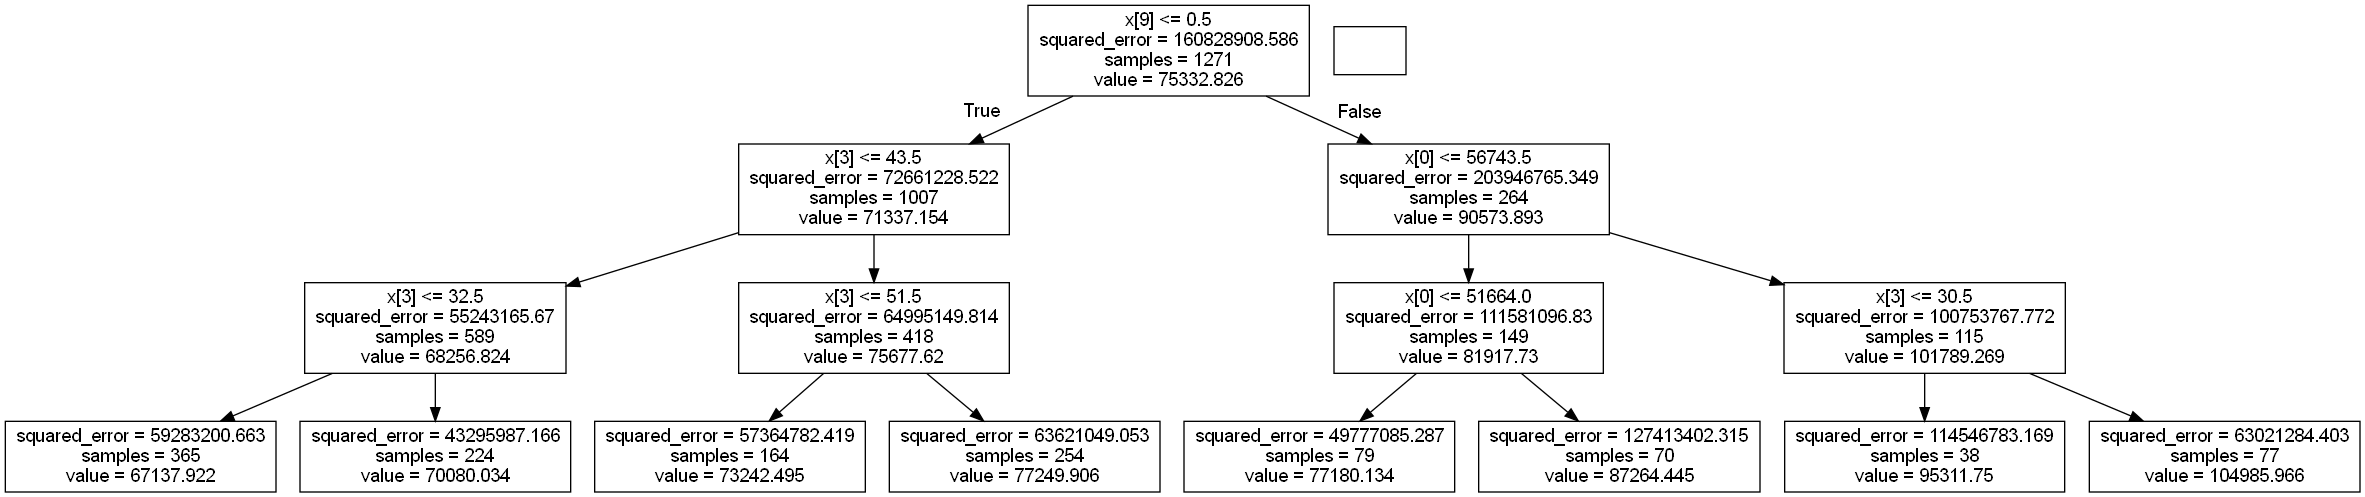

In [213]:
import pydotplus
dot_data = tree.export_graphviz(regtree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

# Decision Tree Regression with GridSearchCV

In [215]:
from sklearn.model_selection import GridSearchCV

In [217]:
param_grid = {
    'max_depth': [2, 3, 4, 5],  
    'min_samples_split': [2,4, 5,6, 10],  
    'min_samples_leaf': [1, 2, 4,6,8]  
}

In [219]:
regtree_gs = tree.DecisionTreeRegressor()

In [221]:
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [223]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 5, 6, 10]},
             scoring='neg_mean_squared_error')

In [225]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [227]:
best_regtree = grid_search.best_estimator_

In [229]:
y_train_pred = best_regtree.predict(X_train)
y_test_pred = best_regtree.predict(X_test)

In [231]:
r2_train_dt = r2_score(y_train, y_train_pred)
r2_test_dt = r2_score(y_test, y_test_pred)

In [233]:
r2_train_dt

0.6397831325660944

In [235]:
r2_test_dt

0.603220439065417

In [237]:
mse_train_dt = mean_squared_error(y_train, y_train_pred)
mse_test_dt = mean_squared_error(y_test, y_test_pred)

In [239]:
mse_train_dt

57933285.64360235

In [241]:
mse_test_dt 

58875901.69009936

# Random forest Regressor

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [245]:
param_grid = {
    'n_estimators': [100,  300],  
    'max_depth': [20, 30],  
    'min_samples_split': [5, 10],
    'min_samples_leaf': [ 2, 4] 
}

In [247]:
rf_gs = RandomForestRegressor()

In [249]:
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [251]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300]},
             scoring='neg_mean_squared_error')

In [253]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [255]:
best_rf = grid_search.best_estimator_

In [257]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [259]:
r2_train_rf = r2_score(y_train, y_train_pred)
r2_test_rf = r2_score(y_test, y_test_pred)

In [261]:
r2_train_rf

0.8963884731214251

In [263]:
r2_test_rf

0.6523603221948446

In [265]:
mse_train_rf = mean_squared_error(y_train, y_train_pred)
mse_test_rf = mean_squared_error(y_test, y_test_pred)

In [267]:
mse_train_rf

16663728.784792798

In [269]:
mse_test_rf

51584309.04511393

# training and testing sets

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [273]:
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

In [275]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [277]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [279]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [281]:
r2_train

0.894749848774254

In [283]:
r2_test

0.589027239623882

In [285]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [287]:
mse_train

17208173.927540958

In [289]:
mse_test

58969397.84613261

# cross_validation

In [291]:
from sklearn.model_selection import cross_val_score

In [293]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [294]:
cv_scores

array([0.58553588, 0.61163763, 0.61711122, 0.64485927, 0.54282967])

In [295]:
cv_mse

array([78633602.55376534, 74254638.82228221, 61731003.58775025,
       51862990.15116889, 60073316.61533731])

In [299]:
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

In [2138]:
mean_cv_r2

0.5961765248818655

In [2139]:
mean_cv_mse

64916117.04478587

# XGBoost Regressor

In [301]:
from xgboost import XGBRegressor

In [303]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 4, 5],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'min_child_weight': [1, 2, 3],  
}

In [305]:
xgb_gs = XGBRegressor()

In [307]:
grid_search = GridSearchCV(xgb_gs, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [2146]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}


In [2147]:
best_xgb_param = grid_search.best_params_
best_xgb = grid_search.best_estimator_

In [2148]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

In [2149]:
r2_train_xgb = r2_score(y_train, y_train_pred)
r2_test_xgb = r2_score(y_test, y_test_pred)

In [2150]:
r2_train_xgb

0.6531205659875161

In [2151]:
r2_test_xgb

0.5930683308017327

In [2152]:
mse_train_xgb = mean_squared_error(y_train, y_train_pred)
mse_test_xgb = mean_squared_error(y_test, y_test_pred)

In [2153]:
mse_train_xgb

56714043.28503834

In [2154]:
mse_test_xgb

58389552.327463485

# Bagging Regressor

In [2156]:
from sklearn.ensemble import BaggingRegressor

In [2157]:
bag_model = tree.DecisionTreeRegressor()

In [2158]:
bagging_reg = BaggingRegressor(bag_model, random_state=0)

In [2159]:
param_grid = {
    'n_estimators': [50, 100, 150, 200] 
}

In [2160]:
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [2161]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [2162]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'n_estimators': 200}


In [2163]:
best_bagging_reg = grid_search.best_estimator_

In [2164]:
y_train_pred = best_bagging_reg.predict(X_train)
y_test_pred = best_bagging_reg.predict(X_test)

In [2165]:
r2_train_bagging_reg = r2_score(y_train, y_train_pred)

In [2166]:
r2_train_bagging_reg

0.9452423921939579

In [2167]:
r2_test_bagging_reg = r2_score(y_test, y_test_pred)

In [2168]:
r2_test_bagging_reg

0.5928202372696956

In [2169]:
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)

In [2170]:
mse_train_bagging_reg

8952751.40233669

In [2171]:
mse_test_bagging_reg

58425150.61427052

# Comparing Different Models

In [2173]:
# Function to colorize values based on a threshold
from tabulate import tabulate
from colorama import Fore, Style
def colorize(value, threshold=0.6):
    if value < threshold:
        return f"{Fore.RED}{value:.4f}{Style.RESET_ALL}"
    return f"{Fore.GREEN}{value:.4f}{Style.RESET_ALL}"

# Define your headings
headings = ["Model", "R-squared (Train)", "R-squared (Test)", "MSE (Train)", "MSE (Test)"]

# Data for the table
data = [
    ["Linear Regression", colorize(r2_lm_multi_train), colorize(r2_lm_multi_test), colorize(mse_lm_multi_train), colorize(mse_lm_multi_test)],
    ["Ridge Regression", colorize(r2_lm_r_best_train), colorize(r2_lm_r_best_test), colorize(mse_lm_r_best_train), colorize(mse_lm_r_best_test)],
    ["Lasso Regression", colorize(r2_lm_l_best_train), colorize(r2_lm_l_best_test), colorize(mse_lm_l_best_train), colorize(mse_lm_l_best_test)],
    ["Decision Tree Regression", colorize(r2_regtree_train), colorize(r2_regtree_test), colorize(mse_regtree_train), colorize(mse_regtree_test)],
    ["Decision Tree with GridSearchCV", colorize(r2_train_dt), colorize(r2_test_dt), colorize(mse_train_dt), colorize(mse_test_dt)],
    ["Random Forest Regressor", colorize(r2_train_rf), colorize(r2_test_rf), colorize(mse_train_rf), colorize(mse_test_rf)],
    ["XG Boost Regressor", colorize(r2_train_xgb), colorize(r2_test_xgb), colorize(mse_train_xgb), colorize(mse_test_xgb)],
    ["Bagging Regressor", colorize(r2_train_bagging_reg), colorize(r2_test_bagging_reg), colorize(mse_train_bagging_reg), colorize(mse_test_bagging_reg)],
]

# Print the table
table = tabulate(data, headers=headings, tablefmt="fancy_grid")
print(table)

╒═════════════════════════════════╤═════════════════════╤════════════════════╤═══════════════╤══════════════╕
│ Model                           │   R-squared (Train) │   R-squared (Test) │   MSE (Train) │   MSE (Test) │
╞═════════════════════════════════╪═════════════════════╪════════════════════╪═══════════════╪══════════════╡
│ Linear Regression               │              0.5335 │             0.5367 │   7.50261e+07 │  6.87513e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Ridge Regression                │              0.5334 │             0.5365 │   7.50358e+07 │  6.87807e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Lasso Regression                │              0.5369 │             0.5335 │   7.50294e+07 │  6.87159e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Decision